# Tools and tecniques for Data science Project

- Kaggle dataset uploading
- EDA
- Data wrangling / cleaning
- Visualizations
- ML models: Logistic Regression, Decision Tree, Random Forest, XGBoost, KNN
- Model evaluation: Accuracy, Precision, Recall, F1-score, Confusion Matrix
- KMeans clustering


In [1]:
!pip install -q kaggle xgboost

%matplotlib inline


In [2]:

from google.colab import files
uploaded = files.upload()

import io
import pandas as pd

df = pd.read_csv(io.BytesIO(uploaded[list(uploaded.keys())[0]]))

print("Dataset Loaded Successfully!")
df.head()


Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv
Dataset Loaded Successfully!


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.cluster import KMeans

sns.set(style='whitegrid')

## Exploratory Data Analysis (EDA)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [6]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [7]:
print('Duplicate rows:', df.duplicated().sum())

Duplicate rows: 0


In [8]:
df.nunique().sort_values()

,0
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
PhoneService,2
PaperlessBilling,2
Churn,2
MultipleLines,3
TechSupport,3
StreamingTV,3


Data Wrangling & Cleaning




In [9]:
# Convert TotalCharges to numeric and handle missing values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print('Missing TotalCharges:', df['TotalCharges'].isnull().sum())


df = df.dropna(subset=['TotalCharges']).reset_index(drop=True)
print('New shape:', df.shape)

Missing TotalCharges: 11
New shape: (7032, 21)


In [10]:
# Drop customerID
df = df.drop(columns=['customerID'])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Visualizations (Charts)


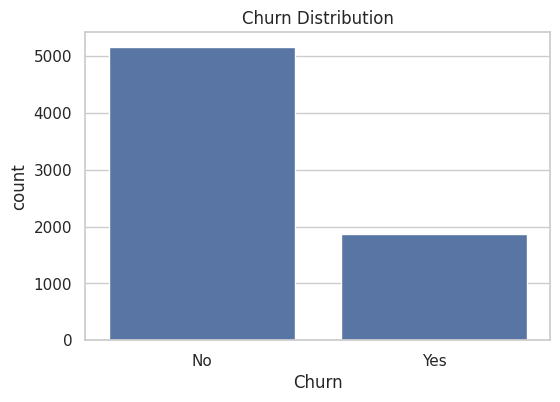

In [11]:
#Churn distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Churn')
plt.title('Churn Distribution')
plt.show()

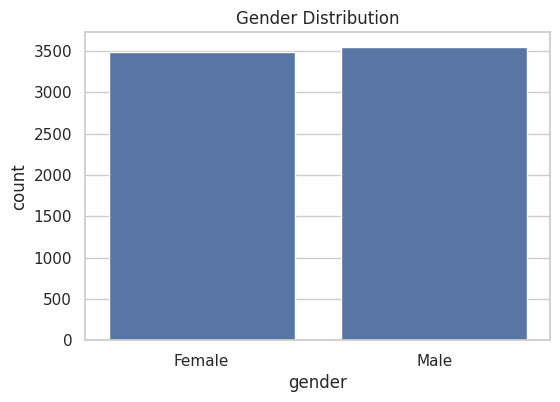

In [12]:
#Gender distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='gender')
plt.title('Gender Distribution')
plt.show()

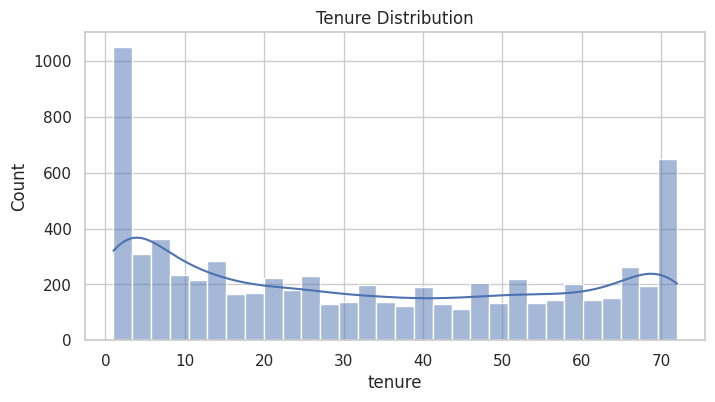

In [13]:
# Tenure distribution
plt.figure(figsize=(8,4))
sns.histplot(df['tenure'], bins=30, kde=True)
plt.title('Tenure Distribution')
plt.show()

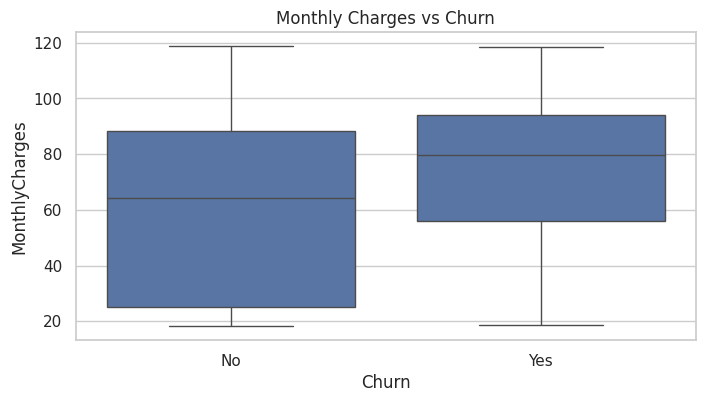

In [14]:
# Monthly Charges vs Churn (boxplot)
plt.figure(figsize=(8,4))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges vs Churn')
plt.show()

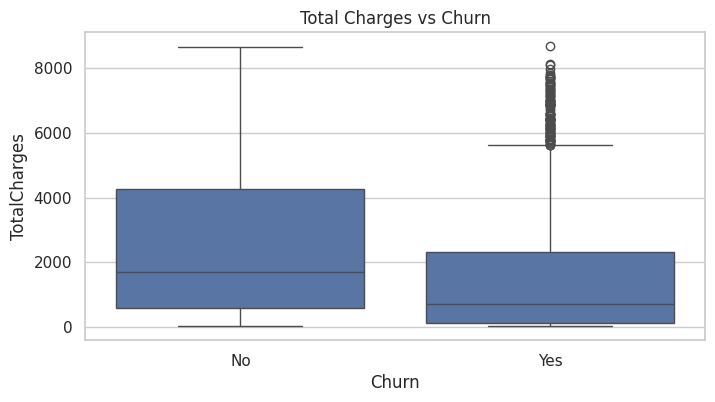

In [15]:
#Total Charges vs Churn
plt.figure(figsize=(8,4))
sns.boxplot(x='Churn', y='TotalCharges', data=df)
plt.title('Total Charges vs Churn')
plt.show()

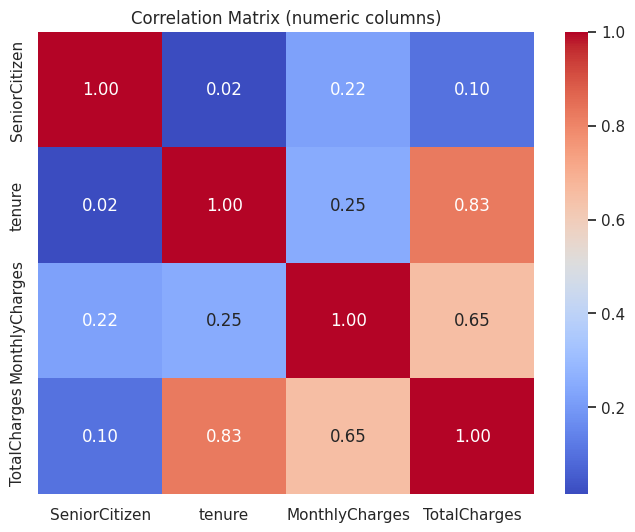

In [16]:
#Correlation heatmap (numeric columns)
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include=['float64','int64']).corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix (numeric columns)')
plt.show()

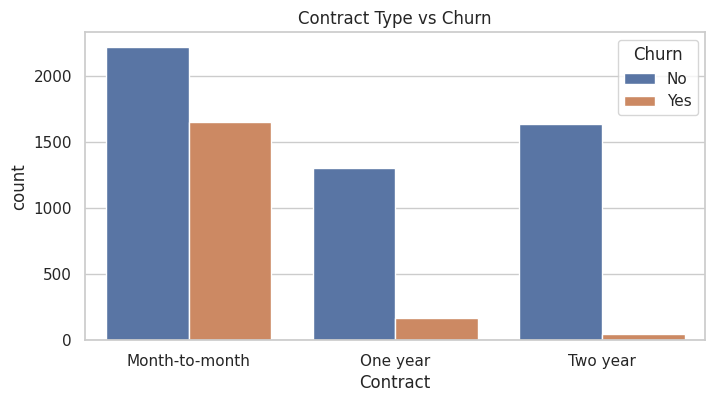

In [17]:
# Countplot for Contract types
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Contract Type vs Churn')
plt.show()

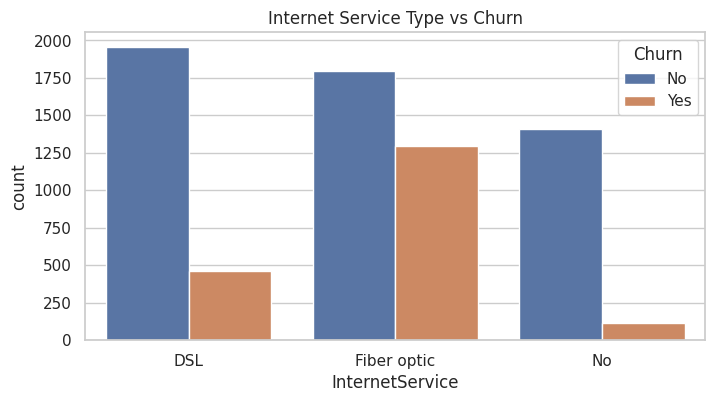

In [18]:
# InternetService and Churn
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='InternetService', hue='Churn')
plt.title('Internet Service Type vs Churn')
plt.show()

## Encoding & Preprocessing

Convert binary yes/no to 0/1, label-encode remaining categorical features, and prepare X/y.

In [19]:
# Map binary columns containing 'Yes'/'No' to 1/0 where applicable
binary_map = {'Yes':1, 'No':0}
for col in df.columns:
    if df[col].dtype == 'object' and df[col].nunique() == 2:
        if set(df[col].unique()) <= set(['Yes','No']):
            df[col] = df[col].map(binary_map)

# Check remaining object columns
df.select_dtypes(include=['object']).columns.tolist()

['gender',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

In [20]:
# Label encode remaining categorical columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))

# now confirming all columns are numeric now
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int64  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int64  
 3   Dependents        7032 non-null   int64  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int64  
 6   MultipleLines     7032 non-null   int64  
 7   InternetService   7032 non-null   int64  
 8   OnlineSecurity    7032 non-null   int64  
 9   OnlineBackup      7032 non-null   int64  
 10  DeviceProtection  7032 non-null   int64  
 11  TechSupport       7032 non-null   int64  
 12  StreamingTV       7032 non-null   int64  
 13  StreamingMovies   7032 non-null   int64  
 14  Contract          7032 non-null   int64  
 15  PaperlessBilling  7032 non-null   int64  
 16  PaymentMethod     7032 non-null   int64  


In [21]:
X = df.drop('Churn', axis=1)
y = df['Churn']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print('Train shape:', X_train.shape, 'Test shape:', X_test.shape)

Train shape: (5625, 19) Test shape: (1407, 19)


In [22]:

num_cols = X.select_dtypes(include=['int64','float64']).columns.tolist()
scaler = StandardScaler()
X_train = X_train.copy()
X_test = X_test.copy()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])


X_train[num_cols].head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1408,0.996274,-0.439319,1.028312,1.529143,1.321816,0.327542,1.112139,0.175326,1.407662,1.229379,1.241630,1.383546,-1.120302,-1.123089,1.567119,-1.21303,-0.535318,0.981556,1.659900
6992,0.996274,-0.439319,-0.972468,-0.653961,-0.267410,-3.053048,0.058090,-1.183089,-0.916406,-1.037918,1.241630,1.383546,-1.120302,-1.123089,-0.830880,-1.21303,0.403324,-0.971546,-0.562252
3349,-1.003740,-0.439319,1.028312,-0.653961,1.444064,0.327542,1.112139,0.175326,-0.916406,1.229379,1.241630,1.383546,-1.120302,-1.123089,1.567119,-1.21303,-0.535318,0.837066,1.756104
4486,0.996274,-0.439319,-0.972468,-0.653961,-1.204646,0.327542,-0.995959,0.175326,-0.916406,1.229379,-1.028168,-0.930592,-1.120302,1.133923,-0.830880,-1.21303,0.403324,0.641092,-0.908326
3535,-1.003740,-0.439319,1.028312,-0.653961,0.669826,-3.053048,0.058090,-1.183089,1.407662,-1.037918,-1.028168,-0.930592,1.136753,-1.123089,-0.830880,-1.21303,-1.473959,-0.808787,-0.101561


## Machine Learning Models

We will train multiple classifiers and evaluate them using Accuracy, Precision/Recall/F1, and Confusion Matrix.

Logistic Regression — Accuracy: 0.7938877043354655

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.86      1033
           1       0.62      0.56      0.59       374

    accuracy                           0.79      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.79      0.79      0.79      1407



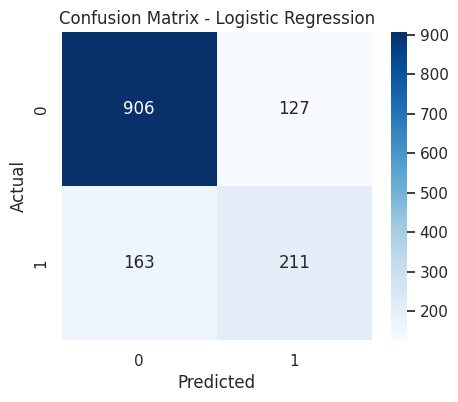

In [23]:
# Logistic Regression
lr = LogisticRegression(max_iter=500, random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print('Logistic Regression — Accuracy:', accuracy_score(y_test, y_pred_lr))
print('\nClassification Report:\n', classification_report(y_test, y_pred_lr))

cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Decision Tree — Accuracy: 0.7142857142857143

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80      1033
           1       0.47      0.50      0.48       374

    accuracy                           0.71      1407
   macro avg       0.64      0.65      0.64      1407
weighted avg       0.72      0.71      0.72      1407



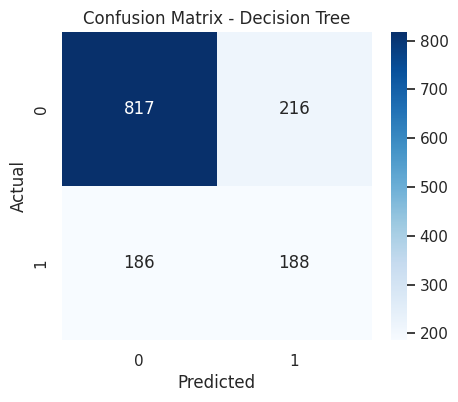

In [24]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print('Decision Tree — Accuracy:', accuracy_score(y_test, y_pred_dt))
print('\nClassification Report:\n', classification_report(y_test, y_pred_dt))

cm = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Random Forest Accuracy: 0.7818052594171997

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.48      0.54       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407



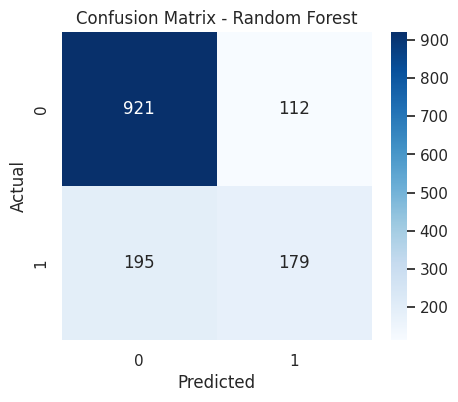

In [25]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print('Random Forest Accuracy:', accuracy_score(y_test, y_pred_rf))
print('\nClassification Report:\n', classification_report(y_test, y_pred_rf))

cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:33:40] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost — Accuracy: 0.7647476901208244

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84      1033
           1       0.56      0.51      0.53       374

    accuracy                           0.76      1407
   macro avg       0.70      0.68      0.69      1407
weighted avg       0.76      0.76      0.76      1407



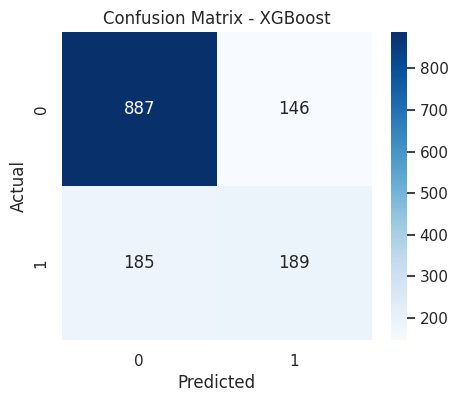

In [26]:
# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print('XGBoost — Accuracy:', accuracy_score(y_test, y_pred_xgb))
print('\nClassification Report:\n', classification_report(y_test, y_pred_xgb))

cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

KNN — Accuracy: 0.7491115849324804

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      1033
           1       0.53      0.53      0.53       374

    accuracy                           0.75      1407
   macro avg       0.68      0.68      0.68      1407
weighted avg       0.75      0.75      0.75      1407



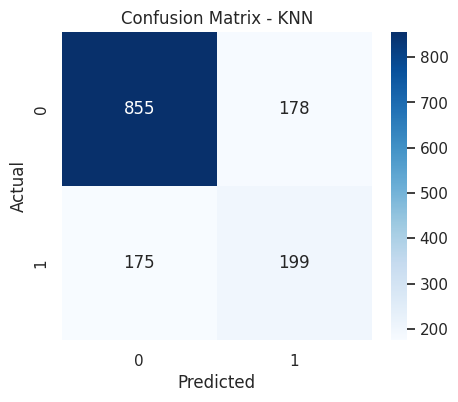

In [27]:
# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print('KNN — Accuracy:', accuracy_score(y_test, y_pred_knn))
print('\nClassification Report:\n', classification_report(y_test, y_pred_knn))

cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [28]:
# Comparing model accuracies
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'KNN'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_xgb),
        accuracy_score(y_test, y_pred_knn)
    ]
})
results = results.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)
results

,Model,Accuracy
0,Logistic Regression,0.793888
1,Random Forest,0.781805
2,XGBoost,0.764748
3,KNN,0.749112
4,Decision Tree,0.714286


KMeans Clustering

Performing KMeans clustering on the dataset (excluding target) and inspects cluster churn rates.

,Churn
Cluster,
0,0.138205
1,0.221947
2,0.321394


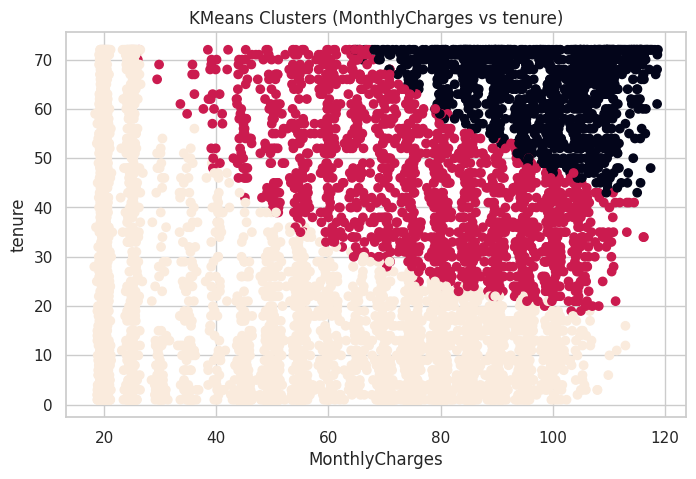

In [29]:
# KMeans clustering
km_df = df.copy().drop(columns=['Churn'])
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(km_df)

df['Cluster'] = clusters
display(df.groupby('Cluster')['Churn'].mean())


plt.figure(figsize=(8,5))
plt.scatter(df['MonthlyCharges'], df['tenure'], c=df['Cluster'])
plt.xlabel('MonthlyCharges')
plt.ylabel('tenure')
plt.title('KMeans Clusters (MonthlyCharges vs tenure)')
plt.show()

In [30]:
# Example: save Random Forest model
# import joblib
# joblib.dump(rf, 'random_forest_telco.pkl')